# Web Scraping
here we are going to get the data from aqar website.
we are looking for houses in North of Riyadh Capital of Saudi Arabia and we will scrap over 6960 house based on some features. and save it in pickle file

In [1]:
from bs4 import BeautifulSoup
import requests
import csv
from itertools import zip_longest
import math
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import patsy
import time, os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression, Ridge 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge,ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score, KFold,GridSearchCV
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV


In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\sul\aqar_1.csv')
df.head()

,Unnamed: 0,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,0,"5,500,000",540 م²,غرب,4,5,2.0,15 م,جديد,183
1,1,"3,700,000",370 م²,شمال,5,5,2.0,15 م,جديد,48
2,2,"2,250,000",300 م²,شرق,4,4,1.0,15 م,NaN,43
3,3,"3,000,000",337 م²,شمال,5,5,2.0,20 م,جديد,53
4,4,"2,500,000",312 م²,جنوب غربي,4,3,5.0,20 م,5 سنة,79


# DATA CLEANING

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6960 entries, 0 to 6959
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6960 non-null   int64  
 1   price         6960 non-null   object 
 2   area          6960 non-null   object 
 3   direction     6960 non-null   object 
 4   bedroom       6960 non-null   int64  
 5   bathroom      6960 non-null   int64  
 6   living_room   6806 non-null   float64
 7   street_width  6946 non-null   object 
 8   house_age     6019 non-null   object 
 9   views         6960 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 543.9+ KB


In [4]:
df.shape

(6960, 10)

In [5]:
df.tail()

,Unnamed: 0,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
6955,6955,"2,600,000",600 م²,جنوب,5,5,2.0,14 م,22 سنة,6119
6956,6956,"2,000,000",375 م²,غرب,4,5,4.0,15 م,14 سنة,5967
6957,6957,"4,500,000",600 م²,شمال,5,5,4.0,15 م,جديد,6935
6958,6958,"4,800,000",800 م²,جنوب,7,5,2.0,15 م,12 سنة,3861
6959,6959,"2,000,000",660 م²,جنوب,6,5,3.0,20 م,NaN,14773


In [6]:
df.isna()

,Unnamed: 0,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
6955,False,False,False,False,False,False,False,False,False,False
6956,False,False,False,False,False,False,False,False,False,False
6957,False,False,False,False,False,False,False,False,False,False
6958,False,False,False,False,False,False,False,False,False,False


In [8]:
# remove null values and update the dataframe
df = df.dropna()
df.isnull().sum()

Unnamed: 0      0
price           0
area            0
direction       0
bedroom         0
bathroom        0
living_room     0
street_width    0
house_age       0
views           0
dtype: int64

In [9]:
#here we dont need Column1 so we want to drop it
df.drop('Unnamed: 0',axis=1,inplace = True )

In [10]:
df.head(55)

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,"5,500,000",540 م²,غرب,4,5,2.0,15 م,جديد,183
1,"3,700,000",370 م²,شمال,5,5,2.0,15 م,جديد,48
3,"3,000,000",337 م²,شمال,5,5,2.0,20 م,جديد,53
4,"2,500,000",312 م²,جنوب غربي,4,3,5.0,20 م,5 سنة,79
5,"3,200,000",442 م²,شرق,4,5,3.0,20 م,جديد,28
6,"3,000,000",375 م²,جنوب,7,5,2.0,15 م,جديد,368
7,"6,000,000",718 م²,شمال,7,5,4.0,15 م,3 سنة,855
8,"2,250,000",312 م²,جنوب,4,4,2.0,15 م,جديد,75
9,"2,500,000",324 م²,شمال شرقي,4,4,2.0,15 م,جديد,90
10,"2,400,000",273 م²,شرق,3,5,3.0,15 م,5 سنة,1656


In [11]:
#remove spaces from columns
df.columns=[column.strip() for column in df.columns]
df.columns

Index(['price', 'area', 'direction', 'bedroom', 'bathroom', 'living_room',
       'street_width', 'house_age', 'views'],
      dtype='object')

In [12]:
df.sample(10)

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
347,"2,600,000",320 م²,جنوب,5,5,2.0,20 م,جديد,2281
2988,"14,000,000",1500 م²,جنوب غربي,7,5,5.0,25 م,6 سنة,5140
978,"6,200,000",600 م²,شمال,5,5,1.0,15 م,جديد,209
4590,"1,250,000",300 م²,شمال,1,5,2.0,10 م,35 سنة,25147
2437,"6,000,000",600 م²,جنوب,5,5,3.0,15 م,جديد,6265
298,"2,350,000",300 م²,جنوب,5,5,2.0,15 م,جديد,601
5549,"4,750,000",750 م²,جنوب شرقي,3,3,3.0,20 م,جديد,13695
3750,"1,250,000",300 م²,شمال,1,5,2.0,10 م,35 سنة,25147
3301,"1,900,000",300 م²,شرق,4,5,3.0,20 م,جديد,15226
4553,"2,800,000",450 م²,غرب,7,5,4.0,15 م,6 سنة,8433


In [13]:
df['price'].max()

'9,500,000'

In [14]:
df['price'].min()

'1,100,000'

In [18]:
#Return number of unique elements 
df.nunique()

price           148
area            234
direction        10
bedroom           7
bathroom          5
living_room       5
street_width     24
house_age        34
views           859
dtype: int64

In [19]:
# to remove all the commas in price column
df.replace(',','', regex=True, inplace=True)

In [20]:
# to remove the squared meter in area column
df.replace(' م²','', regex=True, inplace=True)

In [21]:
# rename values to english 
df['house_age'] = df['house_age'].str.replace('سنة','')
df['house_age'] = df['house_age'].str.replace('جديد','1')
df['street_width'] = df['street_width'].str.replace('م','')
df['direction'] = df['direction'].str.replace('شمال','north')
df['direction'] = df['direction'].str.replace('غرب','west')
df['direction'] = df['direction'].str.replace('جنوب','south')
df['direction'] = df['direction'].str.replace('شرق','east')
df['direction'] = df['direction'].str.replace('جنوب شرقي','southeast')
df['direction'] = df['direction'].str.replace('شمال غربي','northwest')
df['direction'] = df['direction'].str.replace('شمال شرقي','northeast')
df['direction'] = df['direction'].str.replace('جنوب غربي','southwest')
df['direction'] = df['direction'].str.replace('ي','')
df['direction'] = df['direction'].str.replace('3 شوارع','threestreet')




In [22]:
df

,price,area,direction,bedroom,bathroom,living_room,street_width,house_age,views
0,5500000,540,west,4,5,2.0,15,1,183
1,3700000,370,north,5,5,2.0,15,1,48
3,3000000,337,north,5,5,2.0,20,1,53
4,2500000,312,south west,4,3,5.0,20,5,79
5,3200000,442,east,4,5,3.0,20,1,28
...,...,...,...,...,...,...,...,...,...
6954,6000000,600,south,5,5,3.0,15,1,6267
6955,2600000,600,south,5,5,2.0,14,22,6119
6956,2000000,375,west,4,5,4.0,15,14,5967
6957,4500000,600,north,5,5,4.0,15,1,6935


In [23]:
df.shape

(5860, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 0 to 6958
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5860 non-null   object 
 1   area          5860 non-null   object 
 2   direction     5860 non-null   object 
 3   bedroom       5860 non-null   int64  
 4   bathroom      5860 non-null   int64  
 5   living_room   5860 non-null   float64
 6   street_width  5860 non-null   object 
 7   house_age     5860 non-null   object 
 8   views         5860 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 457.8+ KB


In [25]:
df['area'] = df['area'].astype(float)

In [26]:
df['price'] = df['price'].astype(float)

In [27]:
df['house_age'] = df['house_age'].astype(float)

In [28]:
df['street_width'] = df['street_width'].astype(float)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 0 to 6958
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5860 non-null   float64
 1   area          5860 non-null   float64
 2   direction     5860 non-null   object 
 3   bedroom       5860 non-null   int64  
 4   bathroom      5860 non-null   int64  
 5   living_room   5860 non-null   float64
 6   street_width  5860 non-null   float64
 7   house_age     5860 non-null   float64
 8   views         5860 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 457.8+ KB


# Looking For Correlations

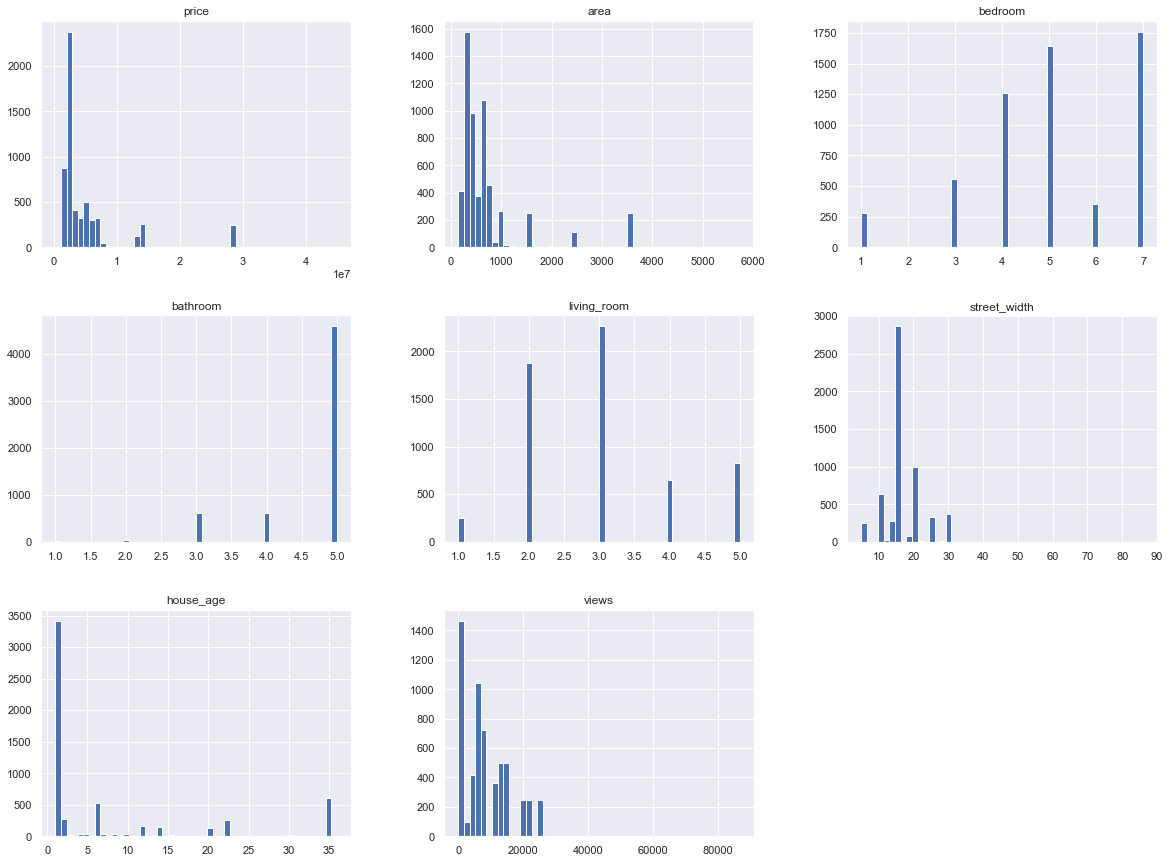

In [30]:
df.hist(bins=50,figsize=(20,15));

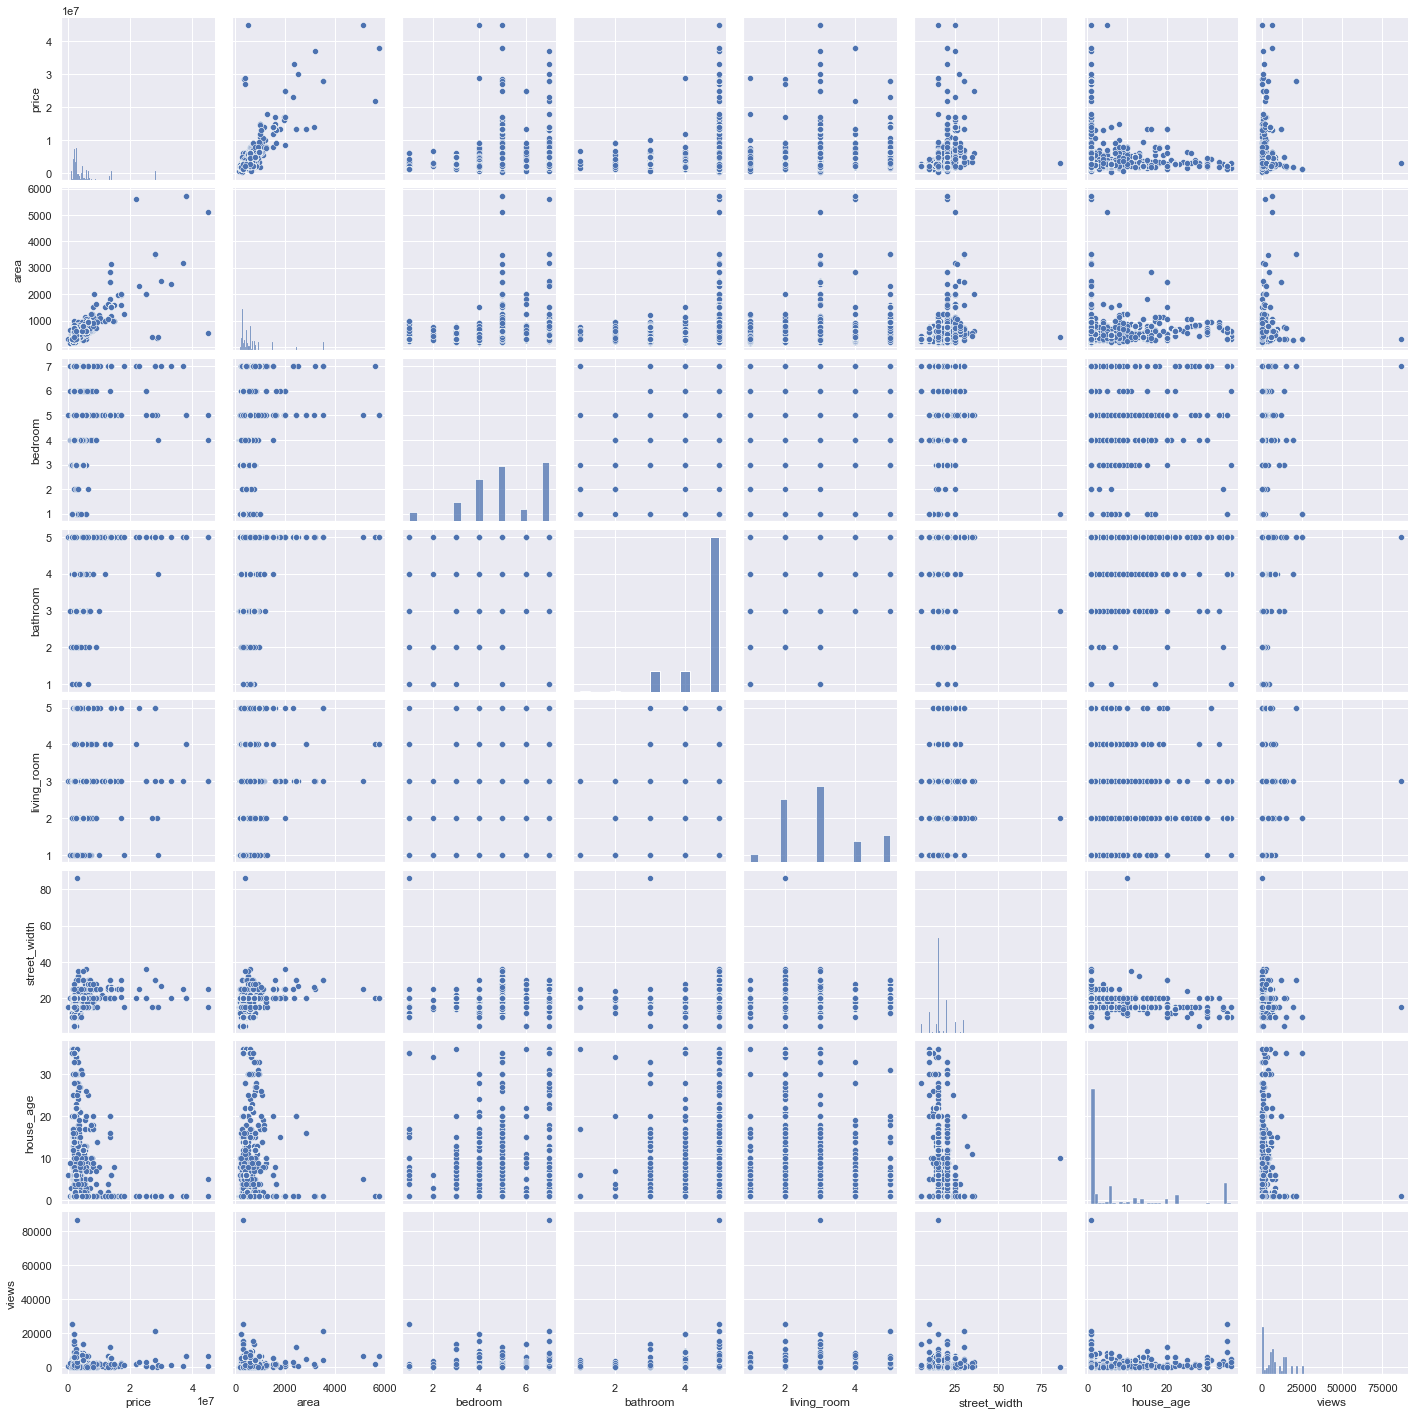

In [31]:
sns.pairplot(df, plot_kws=dict());

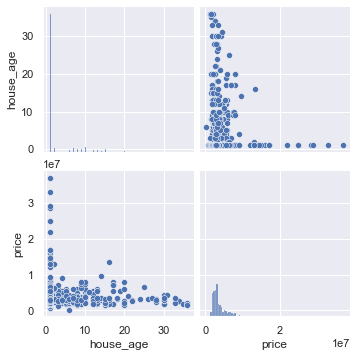

In [32]:
sns.pairplot(df[['house_age','price']][:1000]);

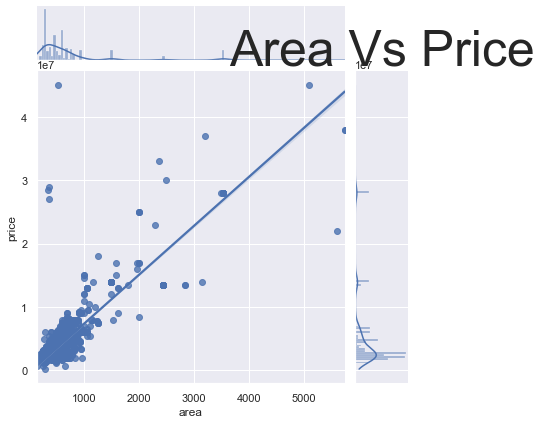

In [33]:
#here plotting the changing an area given prices.
sns.jointplot(x='area', y='price', data = df, kind = 'reg')
plt.title( 'Area Vs Price',fontsize =50);

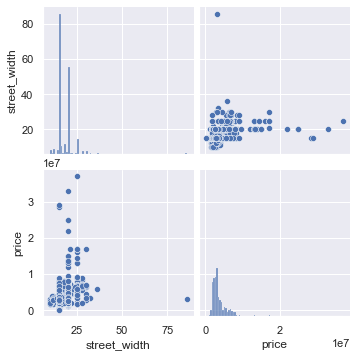

In [34]:
sns.pairplot(df[['street_width','price']][:1000]);

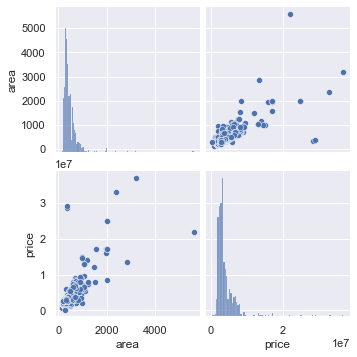

In [35]:
sns.pairplot(df[['area','price']][:1000]);

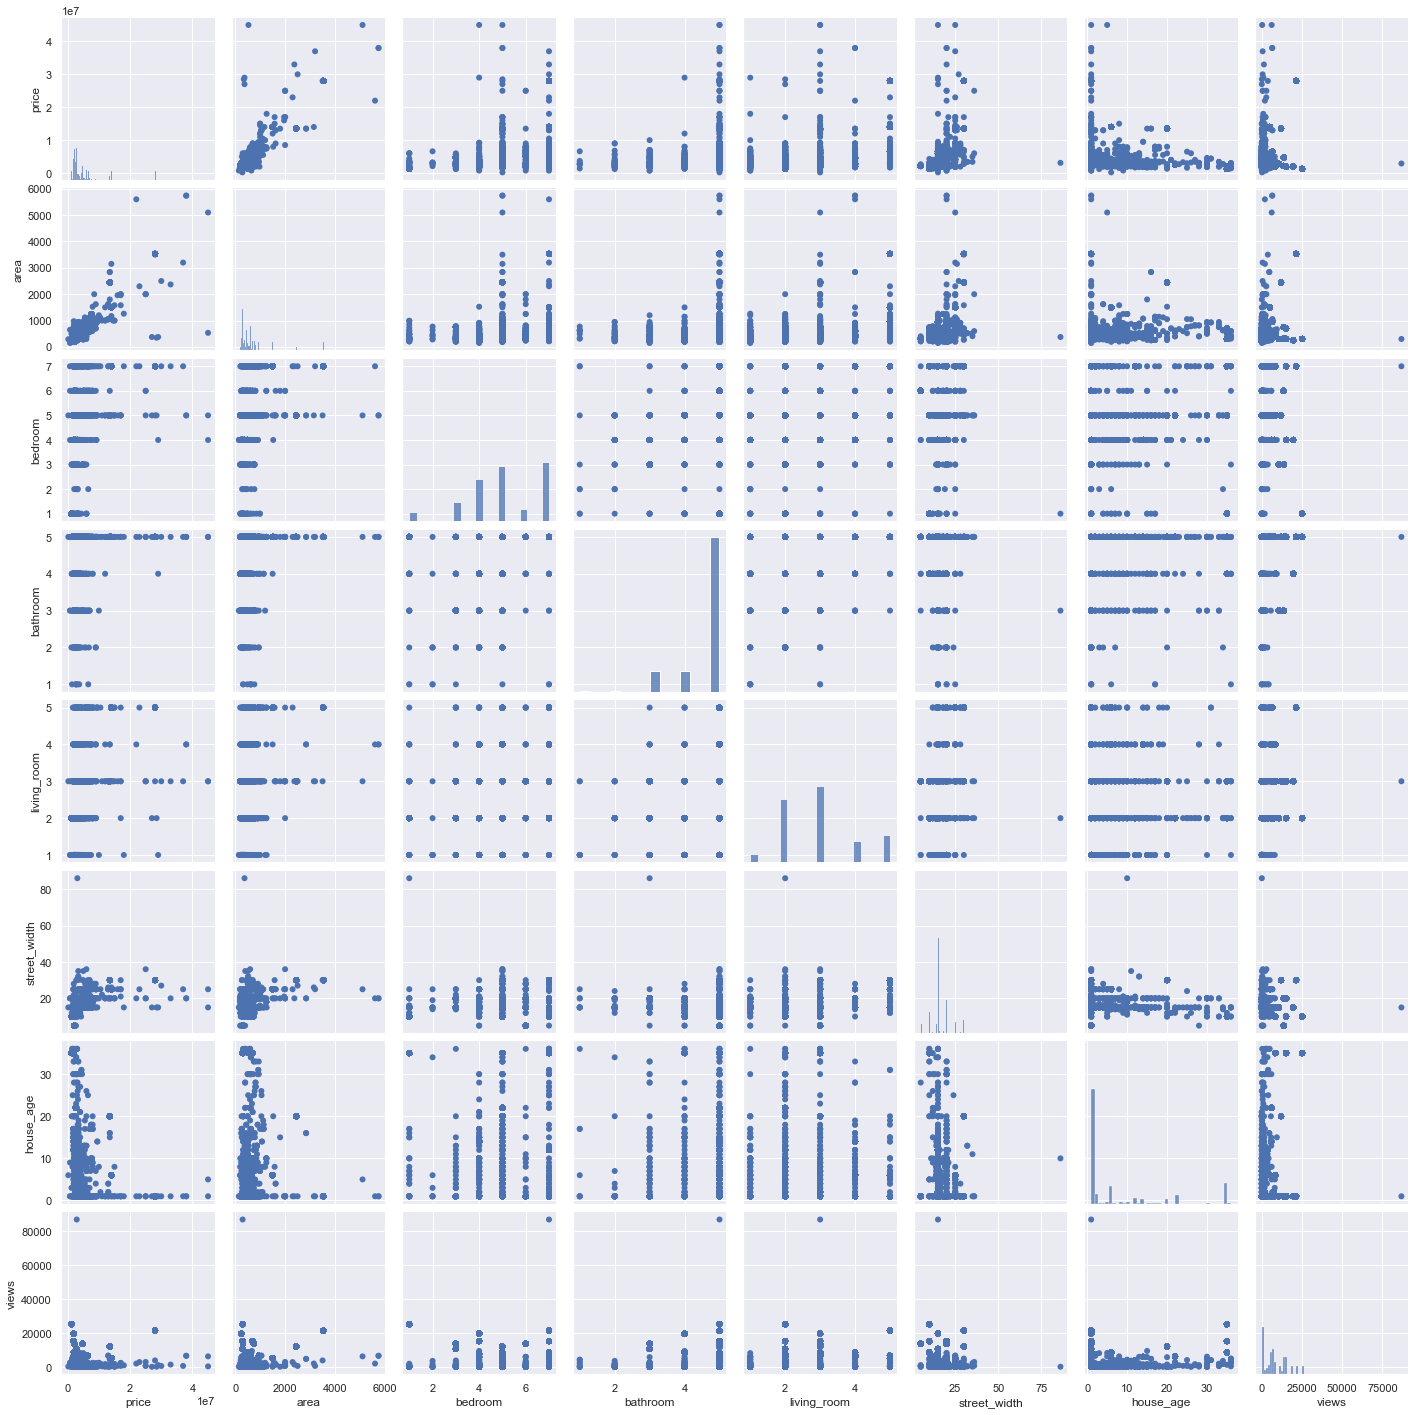

In [36]:
sns.pairplot(df, plot_kws=dict( edgecolor='none'));

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 0 to 6958
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         5860 non-null   float64
 1   area          5860 non-null   float64
 2   direction     5860 non-null   object 
 3   bedroom       5860 non-null   int64  
 4   bathroom      5860 non-null   int64  
 5   living_room   5860 non-null   float64
 6   street_width  5860 non-null   float64
 7   house_age     5860 non-null   float64
 8   views         5860 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 457.8+ KB


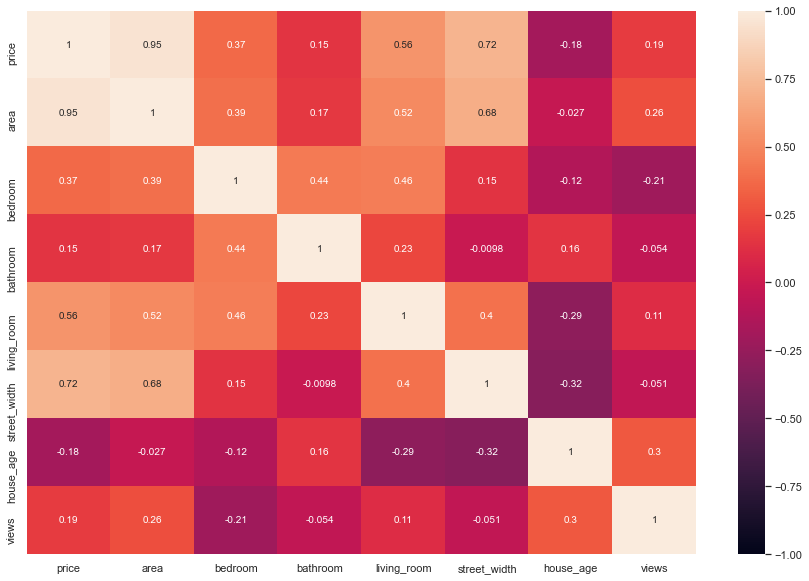

In [38]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.savefig('FCORR.png', transparent=True, bbox_inches='tight');

In [39]:
df.corr()

,price,area,bedroom,bathroom,living_room,street_width,house_age,views
price,1.000000,0.953726,0.374342,0.150941,0.555335,0.717185,-0.184711,0.185813
area,0.953726,1.000000,0.394005,0.168935,0.515531,0.683996,-0.027006,0.263252
bedroom,0.374342,0.394005,1.000000,0.443595,0.455286,0.146102,-0.121897,-0.206610
bathroom,0.150941,0.168935,0.443595,1.000000,0.232607,-0.009834,0.155350,-0.053711
living_room,0.555335,0.515531,0.455286,0.232607,1.000000,0.400069,-0.285679,0.110370
street_width,0.717185,0.683996,0.146102,-0.009834,0.400069,1.000000,-0.316721,-0.051474
house_age,-0.184711,-0.027006,-0.121897,0.155350,-0.285679,-0.316721,1.000000,0.303957
views,0.185813,0.263252,-0.206610,-0.053711,0.110370,-0.051474,0.303957,1.000000


# Baseline Model

In [40]:
#df_numericx=df['area', 'bedroom','bathroom','living_room','street_width','house_age','views','direction']
#df_numericy=df['price'];
y=df_numericx=pd.DataFrame(df,columns=['area', 'bedroom','bathroom','living_room','street_width','house_age','views'])
X=df_numericy=pd.DataFrame(df,columns=['price'])


In [41]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5860 entries, 0 to 6958
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area          5860 non-null   float64
 1   bedroom       5860 non-null   int64  
 2   bathroom      5860 non-null   int64  
 3   living_room   5860 non-null   float64
 4   street_width  5860 non-null   float64
 5   house_age     5860 non-null   float64
 6   views         5860 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 366.2 KB


In [42]:
# FIRST ROUND OF SPLITTING
X, X_test, y, y_test = train_test_split(X,y,test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=40)

In [43]:
numeric_df = X_train.select_dtypes(include=np.number)
X = numeric_df.fillna(0)
y = y_train

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm.score(X_train,y_train)

0.27790765969051584

In [45]:
lm.score(X_val,y_val)

0.2835227267939236

# Regression After Dummy

In [46]:
#dummy column
df= pd.concat([df.drop('direction', axis=1), pd.get_dummies(df['direction'],drop_first=True)], axis=1)


In [47]:
df.head(3)

,price,area,bedroom,bathroom,living_room,street_width,house_age,views,east,north,north east,north west,south,south east,south west,threestreet,west
0,5500000.0,540.0,4,5,2.0,15.0,1.0,183,0,0,0,0,0,0,0,0,1
1,3700000.0,370.0,5,5,2.0,15.0,1.0,48,0,1,0,0,0,0,0,0,0
3,3000000.0,337.0,5,5,2.0,20.0,1.0,53,0,1,0,0,0,0,0,0,0


After converting the categrical coulumns into dummy, we have ended up with 17 coulumns.

In [48]:
df.corr()

,price,area,bedroom,bathroom,living_room,street_width,house_age,views,east,north,north east,north west,south,south east,south west,threestreet,west
price,1.000000,0.953726,0.374342,0.150941,0.555335,0.717185,-0.184711,0.185813,-0.137946,-0.250803,0.014057,-0.043299,-0.163468,0.096365,0.284577,0.635258,-0.128445
area,0.953726,1.000000,0.394005,0.168935,0.515531,0.683996,-0.027006,0.263252,-0.152898,-0.267740,-0.000513,-0.039530,-0.138492,0.180905,0.199508,0.651077,-0.143769
bedroom,0.374342,0.394005,1.000000,0.443595,0.455286,0.146102,-0.121897,-0.206610,-0.137066,-0.227315,-0.008063,-0.072723,0.082544,-0.216277,0.210624,0.361058,0.080466
bathroom,0.150941,0.168935,0.443595,1.000000,0.232607,-0.009834,0.155350,-0.053711,0.029631,-0.106921,0.008919,0.053106,0.068833,-0.365010,0.092596,0.147132,0.097542
living_room,0.555335,0.515531,0.455286,0.232607,1.000000,0.400069,-0.285679,0.110370,-0.074236,-0.220545,-0.018226,-0.108372,-0.299242,-0.013549,0.334560,0.561191,0.128894
street_width,0.717185,0.683996,0.146102,-0.009834,0.400069,1.000000,-0.316721,-0.051474,0.117455,-0.390006,0.033731,-0.012632,-0.206261,0.291122,0.317436,0.330437,-0.028089
house_age,-0.184711,-0.027006,-0.121897,0.155350,-0.285679,-0.316721,1.000000,0.303957,-0.119276,0.071115,-0.024545,-0.078187,0.216915,-0.017673,-0.041547,-0.175128,-0.039236
views,0.185813,0.263252,-0.206610,-0.053711,0.110370,-0.051474,0.303957,1.000000,-0.033905,0.099831,-0.099804,-0.104800,-0.005823,0.114458,-0.147463,0.219901,-0.196469
east,-0.137946,-0.152898,-0.137066,0.029631,-0.074236,0.117455,-0.119276,-0.033905,1.000000,-0.197925,-0.032805,-0.057620,-0.179563,-0.085734,-0.074443,-0.096249,-0.110256
north,-0.250803,-0.267740,-0.227315,-0.106921,-0.220545,-0.390006,0.071115,0.099831,-0.197925,1.000000,-0.067675,-0.118868,-0.370435,-0.176867,-0.153574,-0.198559,-0.227456


In [49]:
df_numerical=df.corr

<ipython-input-50-bf5f3e365486>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr_matrix, dtype=np.bool)


Text(0.5, 1.0, 'Correlation Plot For Variables')

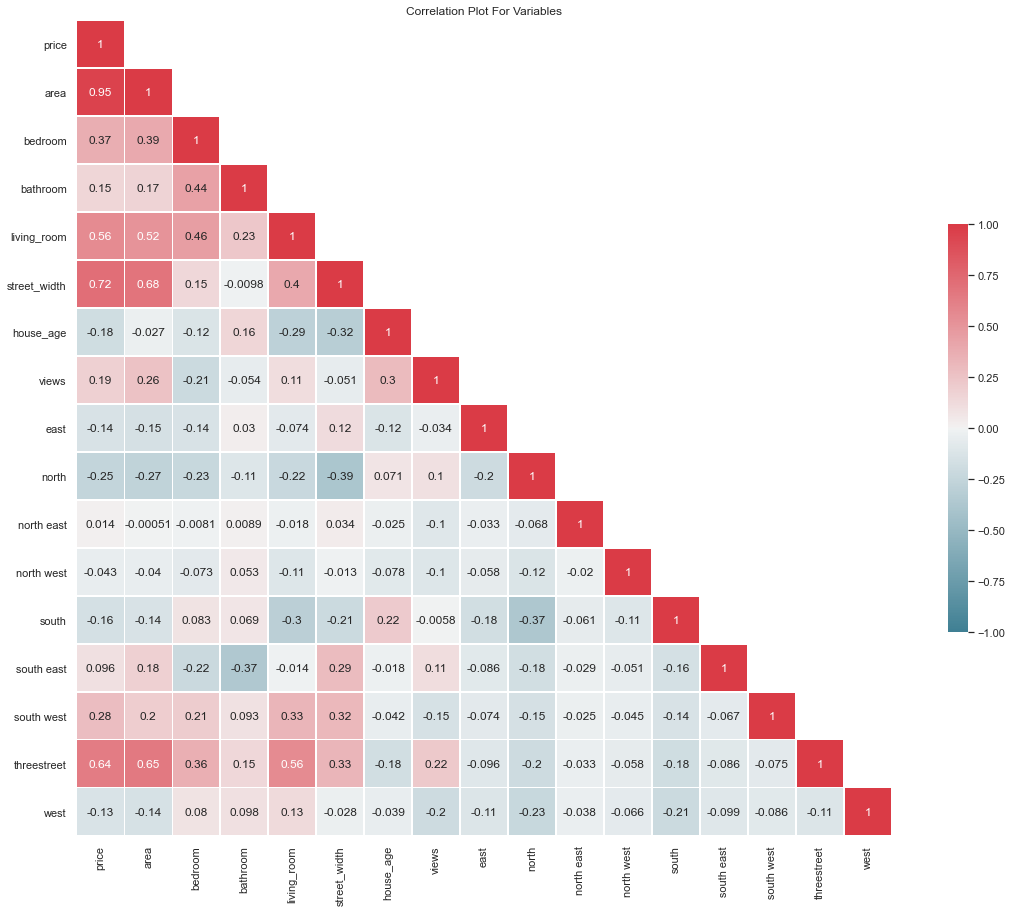

In [50]:
sns.set(style="white")
corr_matrix = df_numerical()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask, k=1)] = True

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns_heat = sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmin=-1,vmax=1, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = sns_heat.get_figure()
plt.title("Correlation Plot For Variables")

In [51]:
df.corr()['price'].sort_values(ascending = False)

price           1.000000
area            0.953726
street_width    0.717185
threestreet     0.635258
living_room     0.555335
bedroom         0.374342
south west      0.284577
views           0.185813
bathroom        0.150941
south east      0.096365
north east      0.014057
north west     -0.043299
west           -0.128445
east           -0.137946
south          -0.163468
house_age      -0.184711
north          -0.250803
Name: price, dtype: float64

In [57]:
#X=['area', 'bedroom','bathroom','living_room','street_width','house_age','views','four_street','south','south_east','south_west','east','north','north_east','north_west','west']
#y=['price'];

In [58]:
# FIRST ROUND OF SPLITTING
X, X_test, y, y_test = train_test_split(df.iloc[:,1:],df['price'], test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=40)

In [59]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = sm.OLS(y,X)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     5611.
Date:                Wed, 08 Dec 2021   Prob (F-statistic):               0.00
Time:                        20:00:34   Log-Likelihood:                -72819.
No. Observations:                4688   AIC:                         1.457e+05
Df Residuals:                    4672   BIC:                         1.458e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
area          7901.3446     64.292    122.898      0.000    7775.302    8027.387
bedroom      -3.095e+05   1.81e+04    -17.128      0.000   -3.45e+05   -2.74e+05
bathroom      3.166e+04   3.57e+04      0.886      0.376   -3.84e+04    1.02e+05
living_room   8.839e+04   2.99e+04      2.960      0.003    2.99e+04    1.47e+05
street_width  1.855e+04   6923.627      2.679      0.007    4972.496    3.21e+04
house_age    -8.634e+04   2308.026    -37.407      0.000   -9.09e+04   -8.18e+04
views          -14.7788      3.664     -4.034      0.000     -21.961      -7.596
east            7.1e+05   2.28e+05      3.120      0.002    2.64e+05    1.16e+06
north         1.247e+06   1.97e+05      6.347      0.000    8.62e+05    1.63e+06
north east    1.519e+06   2.68e+05      5.673      0.000    9.94e+05    2.04e+06
north west    4.735e+05   2.27e+05      2.086      0.037    2.85e+04    9.18e+05
south         1.352e+06   2.06e+05      6.564      0.000    9.48e+05    1.76e+06
south east   -1.101e+06   2.08e+05     -5.299      0.000   -1.51e+06   -6.94e+05
south west    3.291e+06    2.5e+05     13.151      0.000     2.8e+06    3.78e+06
threestreet   9.556e+05   2.34e+05      4.076      0.000    4.96e+05    1.42e+06
west          1.255e+06   2.22e+05      5.657      0.000     8.2e+05    1.69e+06
==============================================================================
Omnibus:                     7325.078   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13847343.626
Skew:                           9.334   Prob(JB):                         0.00
Kurtosis:                     268.598   Cond. No.                     3.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

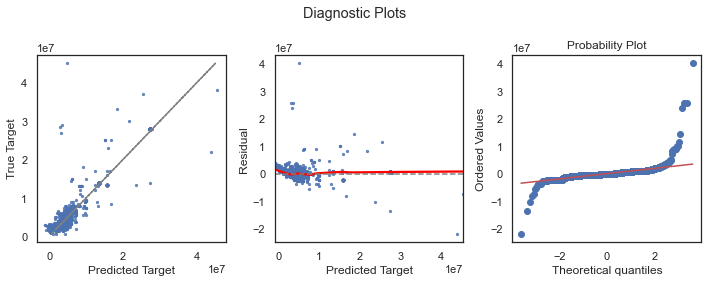

In [61]:
#FIRST CALL ON THE FUNCTION AFTER PERFORMING THE INTITIAL MODEL (OLS)
diagnostic_plots(fit.fittedvalues, y, fit.resid)

In [62]:
m = LinearRegression()

#Feature scaling for train, val, and test so that we can run our model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_val_scaled = scaler.transform(X_val.values)
X_test_scaled = scaler.transform(X_test.values)

In [63]:
m.fit(X_train, y_train)
print(f'Linear Regression train R^2: {m.score(X_train, y_train):.3f}')
print(f'Linear Regression val R^2: {m.score(X_val, y_val):.3f}')

Linear Regression train R^2: 0.945
Linear Regression val R^2: 0.956


In [64]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.9696281021189641

In [65]:
lr_poly.score(X_val_poly, y_val)

0.9648306153142286

## LASSO:

In [66]:
model_lasso = Lasso(alpha = 100000)
model_lasso.fit(X_train, y_train)



Lasso(alpha=100000)

In [67]:
list(zip(X_train.columns, model_lasso.coef_))

[('area', 7562.972329164794),
 ('bedroom', -71613.06187053456),
 ('bathroom', 0.0),
 ('living_room', 83477.54473778795),
 ('street_width', 32748.336490657664),
 ('house_age', -76007.4372717499),
 ('views', -15.767780445306744),
 ('east', -0.0),
 ('north', 0.0),
 ('north east', 0.0),
 ('north west', -0.0),
 ('south', 0.0),
 ('south east', -507052.6662228322),
 ('south west', 24850.950032886165),
 ('threestreet', -0.0),
 ('west', -0.0)]

In [68]:
model_lasso.score(X_train, y_train)

0.9320699403268237

In [69]:
model_lasso.score(X_val, y_val)

0.9411079187343141

In [70]:
model_lasso.coef_

array([ 7.56297233e+03, -7.16130619e+04,  0.00000000e+00,  8.34775447e+04,
        3.27483365e+04, -7.60074373e+04, -1.57677804e+01, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -5.07052666e+05,  2.48509500e+04, -0.00000000e+00, -0.00000000e+00])